In [1]:
import copy, os
from scipy.stats import t
import pandas as pd
pd.set_option('display.precision', 2)
import pickle
from bark.benchmark.benchmark_runner import BenchmarkResult

import seaborn as sns
import matplotlib

import itertools

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
data_file_name = 'benchmark_results.zip'
filepath = "../../results/benchmark/"

odir = '/tmp'

In [3]:
benchmark_result = BenchmarkResult.load(os.path.join(filepath, data_file_name))
df = benchmark_result.get_data_frame().copy()
df.head()

,config_idx,scen_set,scen_idx,behavior,step,collision,steps,out_of_map,velocity,gap,num_agents,safe_distance,goal_reached,Terminal
0,0,merging_mid_dense,0,sa_mcts_200,33,False,34,False,6.75,1.07,11,34,True,[goal_reached]
1,6,merging_light_dense,1,sa_mcts_200,31,False,32,False,8.42,20.38,8,11,True,[goal_reached]
2,12,merging_mid_dense,2,sa_lex_mcts_sd_200,42,False,43,False,7.04,7.70,11,13,True,[goal_reached]
3,18,merging_light_dense,3,sa_lex_mcts_sd_200,38,False,39,False,6.85,31.07,8,21,True,[goal_reached]
4,24,merging_mid_dense,4,Mobil,160,False,161,False,5.54,21.78,10,161,False,[steps]


In [4]:
df.columns

Index(['config_idx', 'scen_set', 'scen_idx', 'behavior', 'step', 'collision',
       'steps', 'out_of_map', 'velocity', 'gap', 'num_agents', 'safe_distance',
       'goal_reached', 'Terminal'],
      dtype='object')

In [5]:
df['success'] = df.Terminal.apply(lambda x: 'goal_reached' in x)
df['safe_distance_violated'] = df['safe_distance']>0
for it in ['200']:
    df.replace(to_replace={'sa_lex_mcts_sd_' + it: 'SA-Lex (SD),' + it + ' iterations', \
                           'sa_mcts_' + it: 'SA,' + it + ' iterations'}, inplace=True)
df[["behavior_model", "iterations"]] = df.behavior.str.split(",",expand=True)

In [6]:
df.sort_values(by=['behavior', 'config_idx'])

,config_idx,scen_set,scen_idx,behavior,step,collision,steps,out_of_map,velocity,gap,num_agents,safe_distance,goal_reached,Terminal,success,safe_distance_violated,behavior_model,iterations
3,20,merging_mid_dense,0,Mobil,160,False,161,False,5.58,11.64,11,161,False,[steps],False,True,Mobil,None
3,21,merging_mid_dense,1,Mobil,160,False,161,False,5.52,20.21,11,151,False,[steps],False,True,Mobil,None
3,22,merging_mid_dense,2,Mobil,160,False,161,False,5.63,18.23,11,161,False,[steps],False,True,Mobil,None
3,23,merging_mid_dense,3,Mobil,160,False,161,False,5.64,18.59,11,161,False,[steps],False,True,Mobil,None
4,24,merging_mid_dense,4,Mobil,160,False,161,False,5.54,21.78,10,161,False,[steps],False,True,Mobil,None
4,25,merging_light_dense,0,Mobil,103,False,104,False,7.54,31.39,8,0,True,[goal_reached],True,False,Mobil,None
4,26,merging_light_dense,1,Mobil,97,False,98,False,7.56,31.96,8,4,True,[goal_reached],True,True,Mobil,None
4,27,merging_light_dense,2,Mobil,69,False,70,False,7.59,39.38,8,54,True,[goal_reached],True,True,Mobil,None
4,28,merging_light_dense,3,Mobil,160,False,161,False,5.84,30.10,8,136,False,[steps],False,True,Mobil,None
4,29,merging_light_dense,4,Mobil,160,False,161,False,6.10,27.80,8,133,False,[steps],False,True,Mobil,None


In [7]:
df.groupby('behavior').count()

,config_idx,scen_set,scen_idx,step,collision,steps,out_of_map,velocity,gap,num_agents,safe_distance,goal_reached,Terminal,success,safe_distance_violated,behavior_model,iterations
behavior,,,,,,,,,,,,,,,,,
Mobil,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0
"SA,200 iterations",10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
"SA-Lex (SD),200 iterations",10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [8]:
def mean_from_bool(col, df):
    tmp_df = copy.deepcopy(df)
    tmp_df[col] = df[col] * 1.0
    stats = df.groupby('behavior')[col].agg(['sum','mean', 'count', 'std'])
    return stats

## Collisions

In [9]:
mean_from_bool('collision', df)

,sum,mean,count,std
behavior,,,,
Mobil,0,False,10,0.0
"SA,200 iterations",0,False,10,0.0
"SA-Lex (SD),200 iterations",0,False,10,0.0


## Safe Distance rule

In [10]:
mean_from_bool('safe_distance_violated', df[df.success == False])

,sum,mean,count,std
behavior,,,,
Mobil,7,True,7,0.0


## Success

In [11]:
mean_from_bool('success', df)

,sum,mean,count,std
behavior,,,,
Mobil,3,0.3,10,0.48
"SA,200 iterations",10,1.0,10,0.00
"SA-Lex (SD),200 iterations",10,1.0,10,0.00


In [12]:
def format_upper_axis(axis):
    axis.xaxis.set_ticklabels([])
    axis.set_xlabel("")

def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    matplotlib.rc("font", family="DejaVu Sans")

In [13]:
# drawing params:
err_width_bars = .0
palette_name = "Set2"

estimator=lambda x: sum(x==1)*100.0/len(x) # scale to percent
order = ['SA', 'SA-Lex (SD)', 'Mobil']

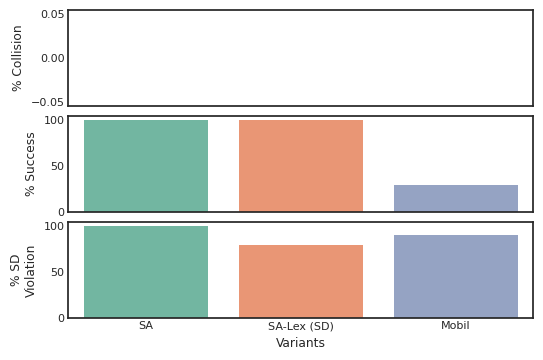

In [14]:
# figure definition
fig = plt.figure()
set_style()
gs = gridspec.GridSpec(3, 1, width_ratios=[1], height_ratios=[1, 1, 1], wspace = 0.02, hspace = 0.1)
axis00 = plt.subplot(gs[0])
axis10 = plt.subplot(gs[1])
axis20 = plt.subplot(gs[2])

# barplot - collision
sns.barplot(x="behavior_model", y="collision", order=order, estimator=estimator, 
            data=df, errwidth=err_width_bars, palette=palette_name, ax=axis00)
sns.barplot(x="behavior_model", y="success", order=order, estimator=estimator, 
            data=df, errwidth=err_width_bars, palette=palette_name, ax=axis10)
sns.barplot(x="behavior_model", y="safe_distance_violated", order=order, estimator=estimator, 
            data=df, errwidth=err_width_bars, palette=palette_name, ax=axis20)

axis20.set_xlabel("Variants")

axis00.set_ylabel("% Collision")
axis10.set_ylabel("% Success")
axis20.set_ylabel("% SD\nViolation")

# format
format_upper_axis(axis00)
format_upper_axis(axis10)

axis00.tick_params(axis='both', which='major', pad=2.5)
axis10.tick_params(axis='both', which='major', pad=2.5)
axis20.tick_params(axis='both', which='major', pad=2.5)

axis00.tick_params(axis=u'both', which=u'both',length=0)
axis10.tick_params(axis=u'both', which=u'both',length=0)
axis20.tick_params(axis=u'both', which=u'both',length=0)

fig.set_size_inches(6, 4)
plt.savefig("/tmp/benchmark_results.png")
plt.show(block=True)